In [19]:

%pip install numpy
%pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load datasets
customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
transactions = pd.read_csv("transactions.csv")

In [22]:
# Convert date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [23]:
# Basic Information and Summary
print("Customers Dataset Info:")
print(customers.info())
print(customers.describe(include='all'))

print("\nProducts Dataset Info:")
print(products.info())
print(products.describe(include='all'))

print("\nTransactions Dataset Info:")
print(transactions.info())
print(transactions.describe())


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25% 

In [24]:
# Check for missing values
print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [25]:
# Merge datasets for a consolidated view
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')


In [26]:
# EDA: Visualizations
sns.set(style="whitegrid")

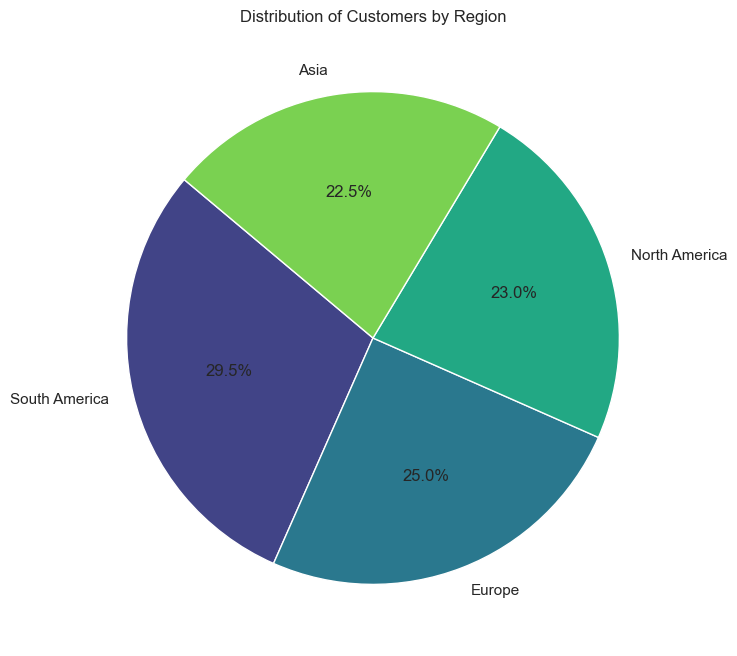

In [27]:
# 1. Distribution of Customers by Region (Pie Chart)
plt.figure(figsize=(8, 8))
customers['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(customers['Region'].unique())))
plt.title("Distribution of Customers by Region")
plt.ylabel("")
plt.show()

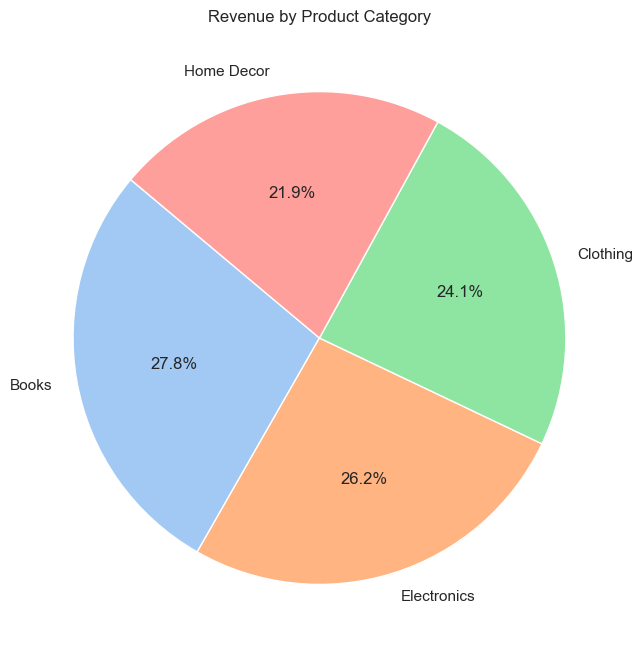

In [28]:
# 2. Revenue by Product Category (Pie Chart)
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel', len(category_revenue)))
plt.title("Revenue by Product Category")
plt.ylabel("")
plt.show()

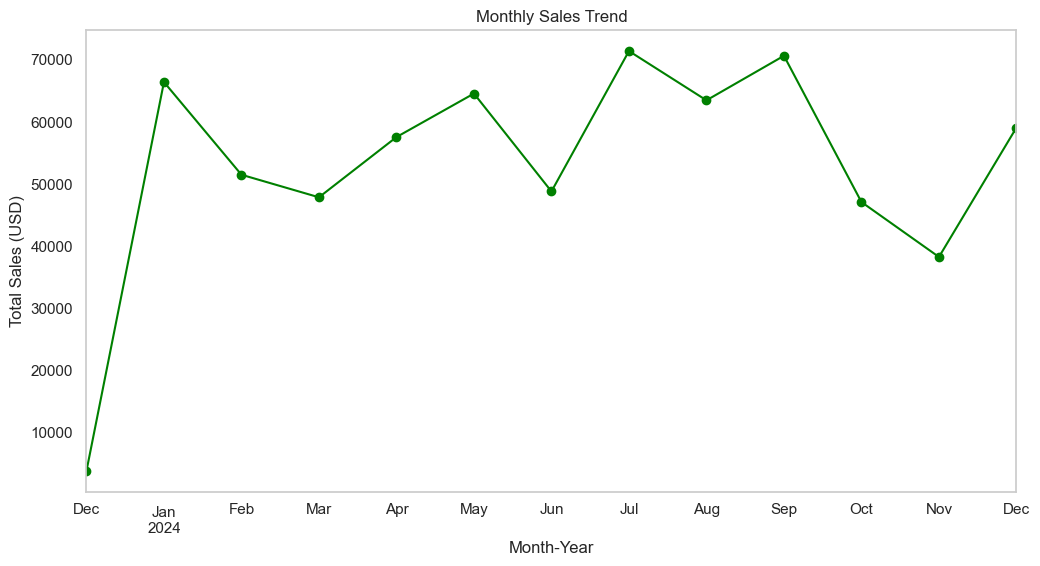

In [29]:
# 3. Monthly Sales Trend
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('MonthYear')['TotalValue'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

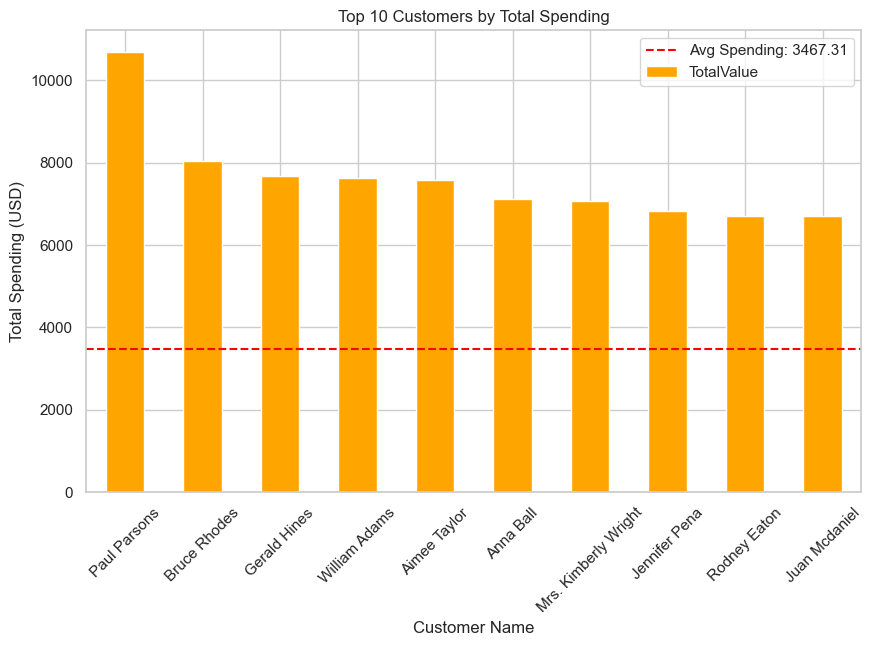

In [37]:
# 4. Top 10 Customers by Total Spending with Average Spending Line
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
avg_spending = merged_data.groupby('CustomerName')['TotalValue'].sum().mean()

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='orange')
plt.axhline(y=avg_spending, color='red', linestyle='--', label=f'Avg Spending: {avg_spending:.2f}')
plt.title("Top 10 Customers by Total Spending")
plt.xlabel("Customer Name")
plt.ylabel("Total Spending (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

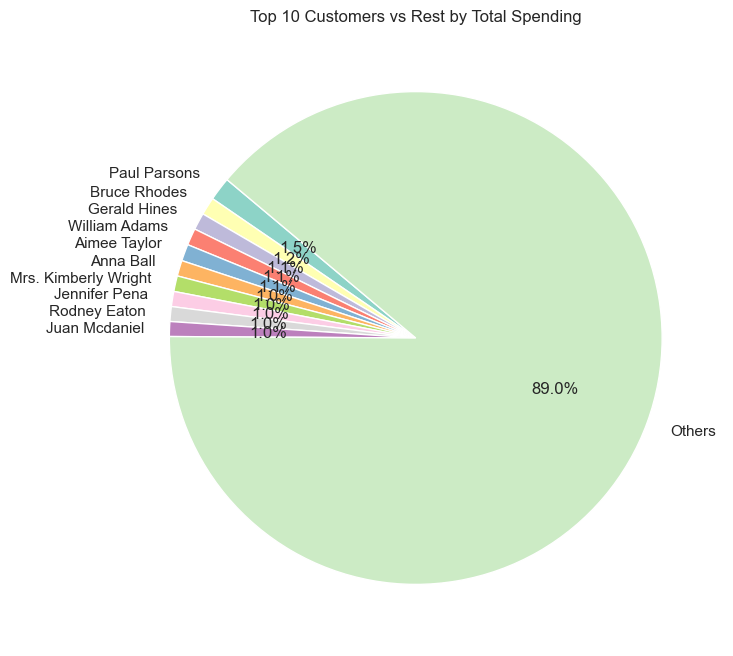

In [ ]:
# 4. Top 10 Customers vs Rest by Total Spending
total_spending = merged_data.groupby('CustomerName')['TotalValue'].sum()
top_customers = total_spending.nlargest(10)
others_spending = total_spending.sum() - top_customers.sum()
spending_data = pd.concat([top_customers, pd.Series({'Others': others_spending})])

plt.figure(figsize=(10, 8))
spending_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(spending_data)))
plt.title("Top 10 Customers vs Rest by Total Spending")
plt.ylabel("")
plt.show()

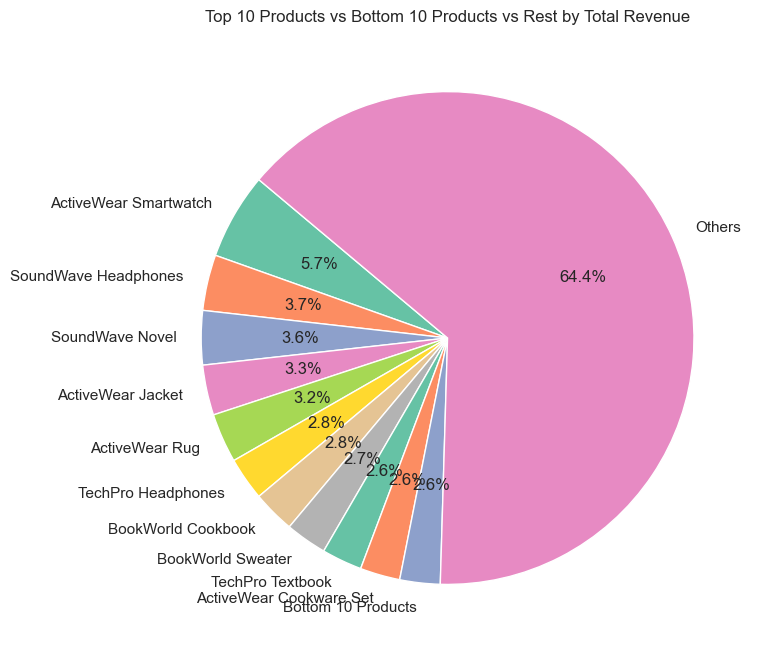

In [33]:
# 5. Top 10 Products vs Bottom 10 Products vs Rest by Total Revenue
total_revenue = merged_data.groupby('ProductName')['TotalValue'].sum()
top_products = total_revenue.nlargest(10)
bottom_products_sum = total_revenue.nsmallest(10).sum()
others_revenue = total_revenue.sum() - (top_products.sum() + bottom_products_sum)
revenue_data = pd.concat([top_products, pd.Series({'Bottom 10 Products': bottom_products_sum, 'Others': others_revenue})])

plt.figure(figsize=(10, 8))
revenue_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2', len(revenue_data)))
plt.title("Top 10 Products vs Bottom 10 Products vs Rest by Total Revenue")
plt.ylabel("")
plt.show()